In [1]:
import numpy as np
import tensorflow as tf
import torch as th
import matplotlib.pyplot as plt

from gan_eeg2img import (
    GanModel,
    GanModelCallback
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import (
    MeanSquaredError,
    BinaryCrossentropy
)


In [2]:
IMAGES_SH = (128, 128, 3)
MELS_SIZE = (14, 32)
EMBEDDING_DIM = 32

In [3]:
train_images, train_mels = th.load("C:\\Users\\1\\Desktop\\EegProject\\train_data.pt")
test_images, test_mels = th.load("C:\\Users\\1\\Desktop\\EegProject\\test_data.pt")

C:\Users\1\AppData\Local\Temp\ipykernel_23128\4053863943.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_images, train_mels = th.load("C:\\Users\\1\\Desktop\\EegPr

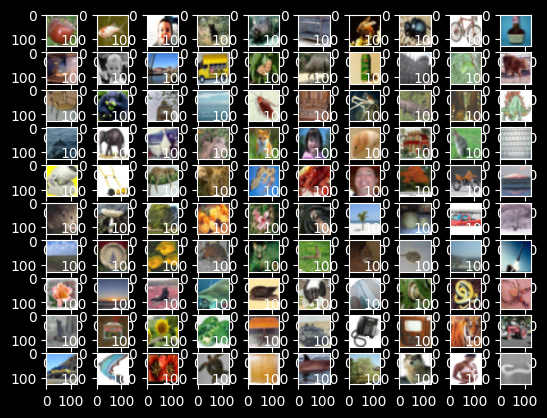

In [4]:
plt.style.use("dark_background")
_, axis = plt.subplots(nrows=10, ncols=10)
sample_n = 0
for i in range(axis.shape[0]):
    for j in range(axis.shape[1]):

        sample = train_images[sample_n] / 255.0
        axis[i, j].imshow(sample)
        sample_n += 1

plt.show()

In [5]:
aug_tr_images, aug_tr_mels = np.concatenate([train_images for _ in range(10)], axis=0), np.concatenate([train_mels for _ in range(10)], axis=0)
aug_ts_images, aug_ts_mels = np.concatenate([test_images for _ in range(10)], axis=0), np.concatenate([test_mels for _ in range(10)], axis=0)

shuffle_train_idx = np.random.randint(0, aug_tr_images.shape[0], aug_tr_images.shape[0])
shuffle_test_idx = np.random.randint(0, aug_ts_images.shape[0], aug_ts_images.shape[0])
train_images, train_mels = aug_tr_images[shuffle_train_idx], aug_tr_mels[shuffle_train_idx]
test_images, test_mels = aug_tr_images[shuffle_test_idx], aug_tr_mels[shuffle_test_idx]

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
train_images = (train_images - np.mean(train_images)) / np.std(train_images)
test_images = (test_images - np.mean(test_images)) / np.std(test_images)
train_mels = (train_mels - np.mean(train_mels)) / np.std(train_mels)
test_mels = (test_mels - np.mean(test_mels)) / np.std(test_mels)

In [8]:
train_mels = np.squeeze(train_mels, axis=-1)
test_mels = np.squeeze(test_mels, axis=-1)

In [9]:
print(train_images.shape, train_mels.shape)

(1000, 128, 128, 3) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


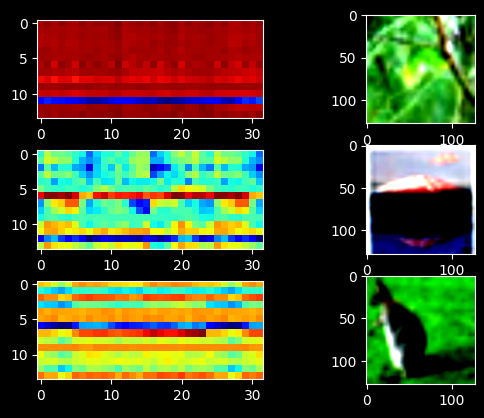

In [10]:
plt.style.use("dark_background")
_, axis = plt.subplots(nrows=3, ncols=2)
for i in range(axis.shape[0]):

    axis[i, 0].imshow(train_mels[i], cmap="jet")
    axis[i, 1].imshow(train_images[i])

plt.show()

In [11]:
model = GanModel(
    input_sh=IMAGES_SH,
    mel_sh=MELS_SIZE,
    embedding_dim=EMBEDDING_DIM
)

In [12]:
print(train_mels.shape)

(1000, 14, 32)


In [13]:
callback = GanModelCallback(
    run_folder="C:\\Users\\1\\Desktop\\EegProject\\models_storage\\gan_logs",
    gen_model=model.gen_,
    data=train_mels 
)

In [14]:
model.compile(
    optimizer=[
        Adam(learning_rate=0.01),
        Adam(learning_rate=0.01)
    ],
    loss=[
        BinaryCrossentropy(),
        BinaryCrossentropy()
    ]
)

Epoch 1/10
32/32 [==============================] - ETA: 0s - gan_loss_tracker: 1.8447 - dis_loss_tracker: 13.9640 - total_loss_tracker: 15.8087(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32/32 [==============================] - 49s 1s/step - gan_loss_tracker: 1.8447 - dis_loss_tracker: 13.9640 - total_loss_tracker: 15.8087
Epoch 2/10
32/32 [==============================] - ETA: 0s - gan_loss_tracker: 2.2856e-09 - dis_loss_tracker: 17.6192 - total_loss_tracker: 17.6192(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 14, 32) (1000, 14, 32)
32/32 [==============================] - 45s 1s/step - gan_loss_tracker: 2.2856e-09 - dis_loss_tracker: 17.6192 - total_loss_tracker: 17.6192
Epoch 3/10
32/32 [==============================] - ETA: 0s - gan_loss_tracker: 9.1224e-13 - dis_loss_tracker: 15.4345 - total_loss_tracker: 15.4345(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 14, 32) (1000, 14, 32)
32/32 [==============================] - 45s 1s/step - gan_loss_tracker: 9.1224e-13 - dis_loss_tracker: 15.4345 - total_loss_tracker: 15.4345
Epoch 4/10
32/32 [==============================] - ETA: 0s - gan_loss_tracker: 6.0647e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
32/32 [==============================] - 46s 1s/step - gan_loss_tracker: 6.0647e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250
Epoch 5/10
32/32 [==============================] - ETA: 0s - gan_loss_tracker: 5.9760e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 14, 32) (1000, 14, 32)
32/32 [==============================] - 51s 2s/step - gan_loss_tracker: 5.9760e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250
Epoch 6/10
32/32 [==============================] - ETA: 0s - gan_loss_tracker: 5.9615e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
32/32 [==============================] - 51s 2s/step - gan_loss_tracker: 5.9615e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250
Epoch 7/10
32/32 [==============================] - ETA: 0s - gan_loss_tracker: 5.9673e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 14, 32) (1000, 14, 32)
32/32 [==============================] - 45s 1s/step - gan_loss_tracker: 5.9673e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250
Epoch 8/10
32/32 [==============================] - ETA: 0s - gan_loss_tracker: 5.9627e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32/32 [==============================] - 42s 1s/step - gan_loss_tracker: 5.9627e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250
Epoch 9/10
32/32 [==============================] - ETA: 0s - gan_loss_tracker: 5.9586e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
32/32 [==============================] - 39s 1s/step - gan_loss_tracker: 5.9586e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250
Epoch 10/10
32/32 [==============================] - ETA: 0s - gan_loss_tracker: 5.9630e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)
(1, 14, 32) (1000, 14, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 14, 32) (1000, 14, 32)
32/32 [==============================] - 41s 1s/step - gan_loss_tracker: 5.9630e-13 - dis_loss_tracker: 15.4250 - total_loss_tracker: 15.4250


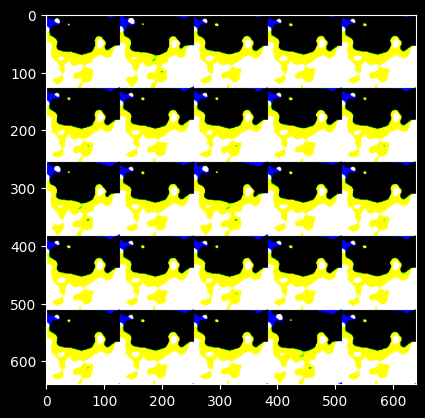

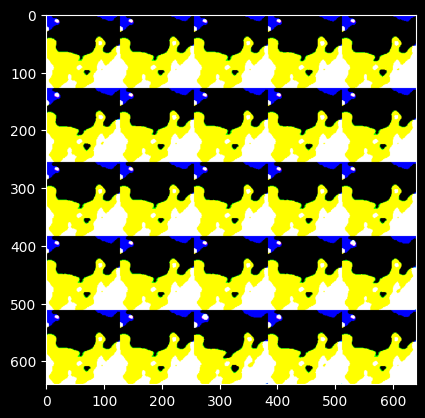

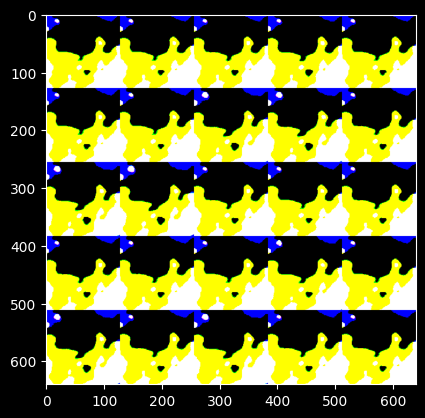

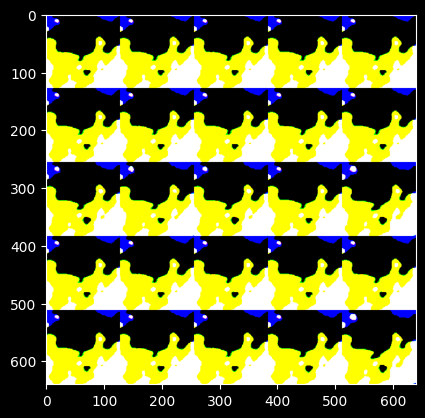

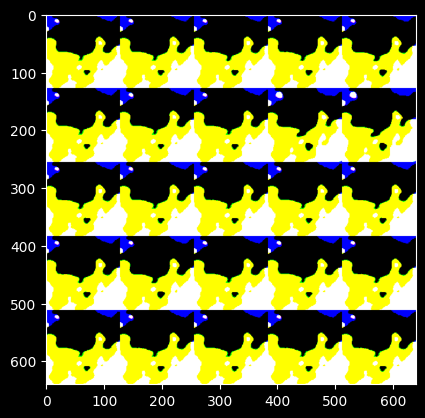

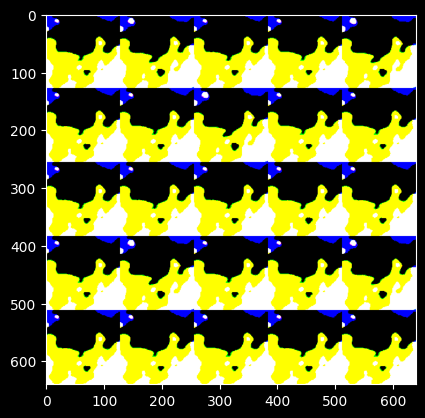

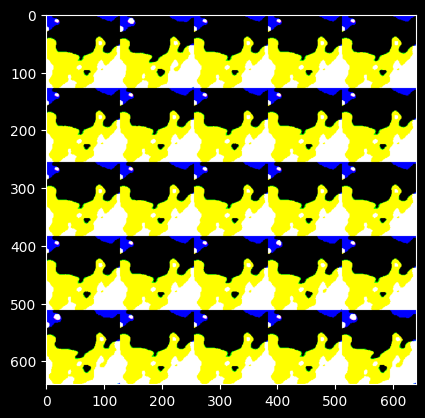

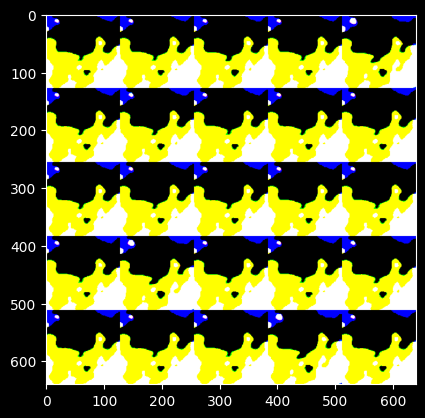

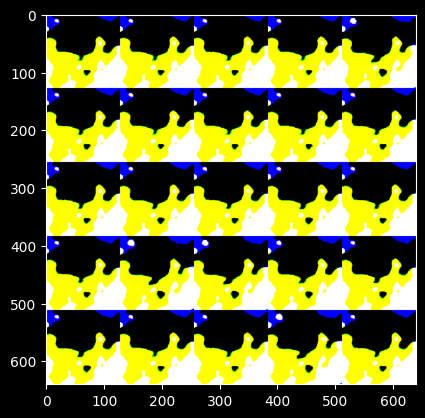

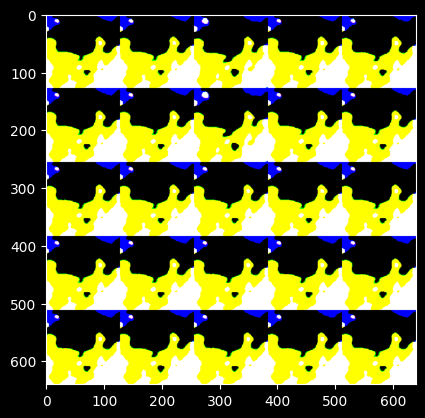

In [15]:
model_hs = model.fit(
    train_mels, train_images,
    epochs=10,  
    batch_size=32, 
    callbacks=[callback]
)

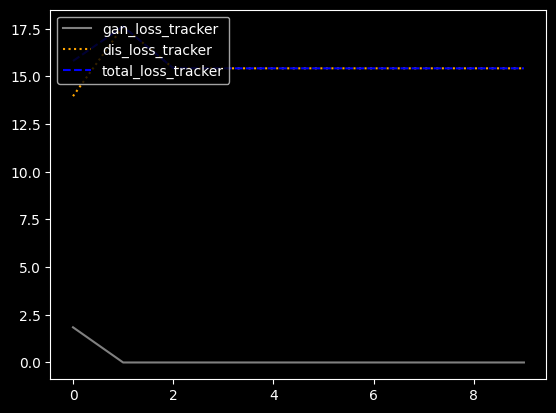

In [16]:
_, axis = plt.subplots()
colors = ["gray", "orange", "blue"]
line_t = ["-", ":", "--"]
for i, (loss_n, loss) in enumerate(model_hs.history.items()):
    axis.plot(loss, c=colors[i], label=loss_n, linestyle=line_t[i])

axis.legend(loc="upper left")
plt.show()

In [17]:
model.save_weights("C:\\Users\\1\\Desktop\\EegProject\\models_storage\\gan_logs\\weights.weights.h5")

In [18]:
generator = model.gen_
encoder = model.enc_

In [27]:
from sklearn.decomposition import PCA
pca_dec = PCA(n_components=2)

313/313 [==============================] - 0s 1ms/step


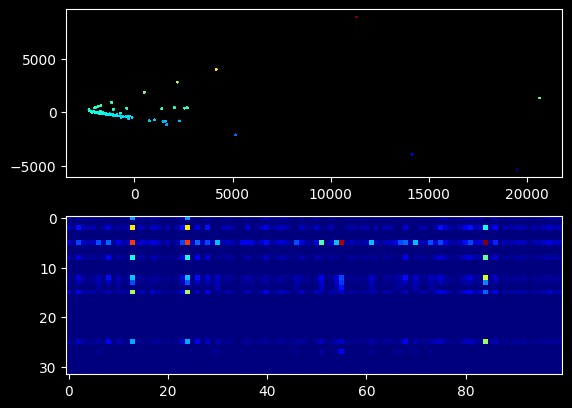

In [40]:
mels_samples = train_mels[np.random.randint(0, train_mels.shape[0], 10000)]
enc_out = encoder.predict(mels_samples)
enc_out_pca = pca_dec.fit_transform(enc_out)
_, axis = plt.subplots(nrows=2)
axis[0].scatter(enc_out_pca[:,  0], enc_out_pca[:, 1], c=enc_out_pca[:, 1], cmap="jet", s=0.12)
axis[1].imshow(enc_out.T[:, :100], cmap="jet")
plt.show()